# 1. Импорт данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")
sample_submition = pd.read_csv('sample_submission.csv')

# посмотрим 7 случаных строк в датасете
train_df.sample(7)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1125,1126,20,RL,60.0,10434,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2009,WD,Normal,115000
492,493,60,RL,105.0,15578,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,New,Partial,172785
908,909,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
422,423,20,RL,100.0,21750,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,113000
69,70,50,RL,81.0,15593,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,225000
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000
463,464,70,RL,74.0,11988,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,188700


In [3]:
# и тут
test.sample(7)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
48,1509,60,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdWo,NaN,0,6,2010,WD,Normal
1363,2824,80,RL,78.0,11679,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,5,2006,WD,Normal
934,2395,60,RL,80.0,8800,Pave,NaN,Reg,Lvl,AllPub,...,161,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal
694,2155,60,RL,50.0,9360,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdWo,NaN,0,11,2008,WD,Normal
301,1762,60,RL,NaN,8970,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,6,2009,WD,Normal
515,1976,20,RL,92.0,10845,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal
424,1885,20,RL,90.0,15750,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal


In [4]:
# узнаем размерность датасета
print(f"Size dataset: {train_df.shape}")

Size dataset: (1460, 81)


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

По информации сверху видно, что у меня 38 числовых данных и 43 категориальных. 

In [6]:
train_df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Посмотрим на статистику

In [7]:
train_df.describe(include=np.number)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# посмотрим на статистику категориальных данных
train_df.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [9]:
train_df.duplicated().sum()

0

# Объединение тестовой и тренировочный выборки.


У нас есть 2 набора данных: train и test. Произведу объединение 
тих дата сетов для более быстрой очистки данных.

In [10]:
#выделение ключевой переменной
target = train_df['SalePrice']
test_id = test['Id']

train_new = train_df.drop(['SalePrice', 'Id'], axis=1)
test_new = test.drop('Id', axis=1)

data = pd.concat([train_new, test_new], axis=0).reset_index(drop=True)
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


Ниже это те столбцы, в которых хранятся нечисловые данные

In [11]:
data.select_dtypes('object').loc[:, data.isna().sum() > 0 ].columns

Index(['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')

Так как после объединения данных у нас появилось много шумов и мусора, то данные стоит почистить.
Для этого заменим промущенные данные None - в категориальном случае и 0 - в для количественных признаков.

In [12]:
for column in [
    'Alley',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure', 
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'GarageType', 
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PoolQC', 
    'Fence', 
    'MiscFeature'
]:
    data[column] = data[column].fillna('None')
    
for column in [
    'MSZoning',
    'Utilities',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'Electrical',
    'KitchenQual',
    'Functional',
    'SaleType'
]:
    data[column] = data[column].fillna(data[column].mode()[0])    

In [13]:
#Проверка очистки
data.select_dtypes('object').isna().sum().sum()

0

Далее, создадим функцию для очитки данных по всему дата сету

In [14]:
from sklearn.neighbors import KNeighborsRegressor
data_new= data.copy()

data_new.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      486
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 79, dtype: int64

In [15]:
data_new.loc[data_new['LotFrontage'].isna() == False, 'LotFrontage']

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
        ...  
2914     21.0
2915     21.0
2916    160.0
2917     62.0
2918     74.0
Name: LotFrontage, Length: 2433, dtype: float64

In [16]:
def knn_imput(df, target):   
    
    df = df.copy()
     
    num_df = df.select_dtypes(np.number)
    nt_num_col = num_df.loc[:, num_df.isna().sum() == 0].columns
    
    y_train = num_df.loc[num_df[target].isna() == False, target]
    x_train = num_df.loc[num_df[target].isna() == False, nt_num_col]
    x_test = num_df.loc[num_df[target].isna() == True, nt_num_col]
    
    knn = KNeighborsRegressor()
    knn.fit(x_train, y_train)
    
    y_pred = knn.predict(x_test)
    
    df.loc[df[target].isna() == True, target] = y_pred
    
    return df

In [17]:
#заполнение данных в пустых строчках
for column in data_new.columns[data_new.isna().sum() > 0]:
    data_new = knn_imput(data_new, column)

In [18]:
data_new

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,0,None,None,None,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,MnPrv,Shed,700,7,2006,WD,Normal


# Feature Engineering

In [19]:
data_new ['SqRoom'] = data_new['GrLivArea'] / (data_new['FullBath'] + data_new['HalfBath'] + 
                                               data_new['KitchenAbvGr'] + data_new['TotRmsAbvGrd'])

data_new['Total_Homa_Quality'] = data_new['OverallCond'] + data_new['OverallQual']

data_new['Total_Bathroom'] = (data_new['FullBath'] + 0.5 * data_new['HalfBath'] + data_new['BsmtFullBath'] + 0.5 * data_new['BsmtHalfBath'])

data_new['HighQualSf'] = data_new['1stFlrSF'] + data_new['2ndFlrSF']

# Преобразование объектов

После очистки данных нам нужно посмотреть на их распеределение


In [20]:
import scipy.stats
skew_df = pd.DataFrame(data_new.select_dtypes(np.number). columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feat: scipy.stats.skew(data_new[feat]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,MSSubClass,1.375457,1.375457,True
1,LotFrontage,1.340324,1.340324,True
2,LotArea,12.822431,12.822431,True
3,OverallQual,0.197110,0.197110,False
4,OverallCond,0.570312,0.570312,True
5,YearBuilt,-0.599806,0.599806,True
6,YearRemodAdd,-0.451020,0.451020,False
7,MasVnrArea,2.603460,2.603460,True
8,BsmtFinSF1,1.425383,1.425383,True
9,BsmtFinSF2,4.146143,4.146143,True


In [21]:
for column in skew_df.query('Skewed == True')['Feature'].values:
    data_new[column] = np.log1p(data_new[column])

#### Cos transform for cycle

In [22]:
data_new['MoSold'] = (-np.cos(0.525 * data_new['MoSold']))

In [23]:
data_new = pd.get_dummies(data_new)

Пересчет

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data_new)

data_new = pd.DataFrame(scaler.transform(data_new), index=data_new.index, columns=data_new.columns)

In [25]:
data_new

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.419418,-0.064594,-0.103719,0.646183,-0.435439,1.040634,0.896833,1.210052,0.783362,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,-1.120845,0.535716,0.146544,-0.063185,1.906370,0.161526,-0.395604,-0.804568,0.892580,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.419418,0.065707,0.457629,0.646183,-0.435439,0.975922,0.848965,1.137809,0.658286,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,0.638691,-0.295522,0.136301,0.646183,-0.435439,-1.869638,-0.682812,-0.804568,0.387049,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,0.419418,0.677010,0.922662,1.355551,-0.435439,0.943542,0.753229,1.430299,0.758241,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.821276,-3.284932,-2.993401,-1.481920,1.226101,-0.035461,-0.682812,-0.804568,-1.418101,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2915,1.821276,-3.284932,-3.036401,-1.481920,-0.435439,-0.035461,-0.682812,-0.804568,0.438552,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
2916,-1.120845,2.549373,1.586172,-0.772552,1.226101,-0.365110,0.561757,-0.804568,0.967795,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
2917,0.915540,-0.200957,0.311255,-0.772552,-0.435439,0.683917,0.370284,-0.804568,0.535742,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


Target transformation

/tmp/ipykernel_49430/869498858.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target, kde=True, fit=scipy.stats.norm)
/tmp/ipykernel_49430/869498858.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(target), kde=True, fit=scipy.stats.norm)


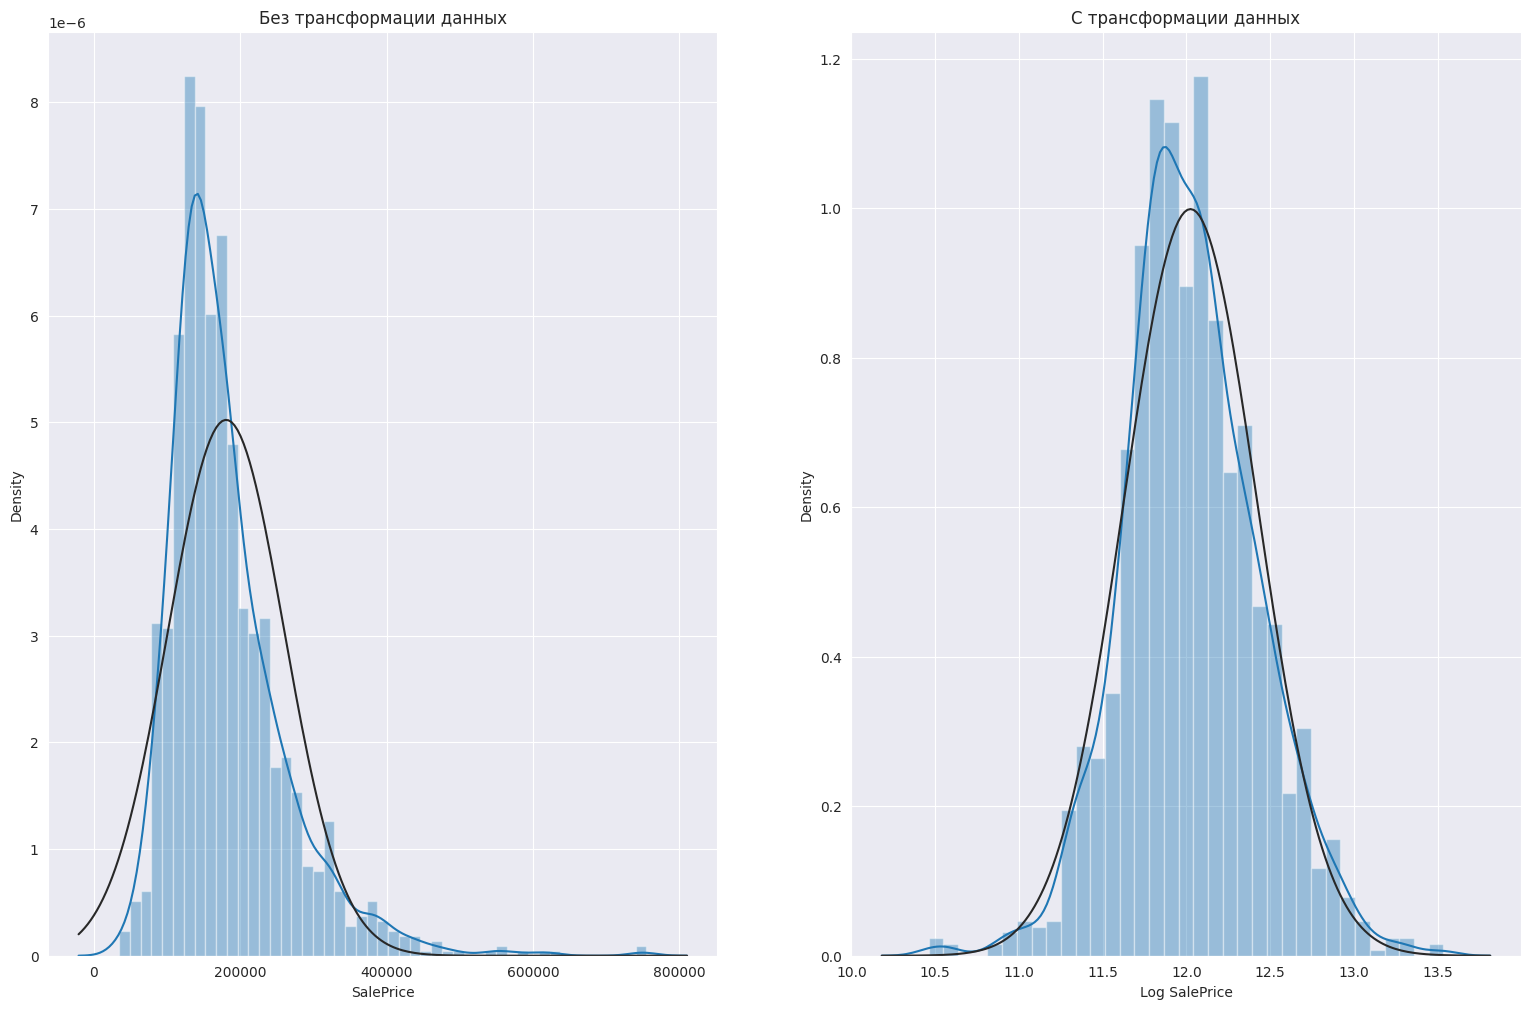

In [26]:
sns.set_style('darkgrid')

plt.figure(figsize=(19, 12))

plt.subplot(1, 2, 1)
sns.distplot(target, kde=True, fit=scipy.stats.norm)
plt.title("Без трансформации данных")

plt.subplot(1, 2, 2)
sns.distplot(np.log(target), kde=True, fit=scipy.stats.norm)
plt.xlabel('Log SalePrice')
plt.title("C трансформации данных")

plt.show()

In [27]:
lg_target = np.log(target)

# Разделение данных
После очитки и нормализации данных нужно будет разделить данные на тренировочные и тестовые.

In [28]:
train_final = data_new.loc[:train_df.index.max(), :].copy()
test_final = data_new.loc[train_df.index.max() + 1:, :].copy()

In [29]:
train_final

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.419418,-0.064594,-0.103719,0.646183,-0.435439,1.040634,0.896833,1.210052,0.783362,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,-1.120845,0.535716,0.146544,-0.063185,1.906370,0.161526,-0.395604,-0.804568,0.892580,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.419418,0.065707,0.457629,0.646183,-0.435439,0.975922,0.848965,1.137809,0.658286,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,0.638691,-0.295522,0.136301,0.646183,-0.435439,-1.869638,-0.682812,-0.804568,0.387049,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,0.419418,0.677010,0.922662,1.355551,-0.435439,0.943542,0.753229,1.430299,0.758241,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.419418,-0.200957,-0.231508,-0.063185,-0.435439,0.911146,0.753229,-0.804568,-1.418101,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1456,-1.120845,0.711294,0.767440,-0.063185,0.454875,0.227056,0.178812,1.021025,0.821032,2.352717,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1457,0.638691,-0.020514,0.029092,0.646183,2.514892,-0.996100,1.040437,-0.804568,0.467747,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1458,-1.120845,0.065707,0.170303,-0.772552,0.454875,-0.696444,0.561757,-0.804568,-0.105476,3.331015,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


In [30]:
test_final

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,-1.120845,0.535716,0.521437,-0.772552,0.454875,-0.332070,-1.113625,-0.804568,0.645649,2.287158,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1461,-1.120845,0.571683,0.923625,-0.063185,0.454875,-0.431241,-1.257229,0.984363,0.873179,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1462,0.419418,0.310122,0.862607,-0.772552,-0.435439,0.846305,0.657493,-0.804568,0.821456,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1463,0.419418,0.462430,0.222291,-0.063185,0.454875,0.878733,0.657493,0.356386,0.729974,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1464,1.408728,-1.253125,-1.130892,1.355551,-0.435439,0.683917,0.370284,-0.804568,0.452832,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.821276,-3.284932,-2.993401,-1.481920,1.226101,-0.035461,-0.682812,-0.804568,-1.418101,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2915,1.821276,-3.284932,-3.036401,-1.481920,-0.435439,-0.035461,-0.682812,-0.804568,0.438552,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
2916,-1.120845,2.549373,1.586172,-0.772552,1.226101,-0.365110,0.561757,-0.804568,0.967795,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
2917,0.915540,-0.200957,0.311255,-0.772552,-0.435439,0.683917,0.370284,-0.804568,0.535742,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


Выбор модели

In [44]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 306 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(306)
memory usage: 3.4 MB


In [31]:
from pycaret.regression import setup, compare_models

In [32]:
_ = setup(data=pd.concat([train_final, lg_target], axis=1), target='SalePrice')

,Description,Value
0,Session id,7295
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 307)"
4,Transformed data shape,"(1460, 307)"
5,Transformed train set shape,"(1021, 307)"
6,Transformed test set shape,"(439, 307)"
7,Numeric features,306
8,Preprocess,True
9,Imputation type,simple


In [33]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.0899,0.0169,0.1291,0.8872,0.0099,0.0075,0.4330
lightgbm,Light Gradient Boosting Machine,0.0920,0.0176,0.1318,0.8831,0.0102,0.0077,0.2320
br,Bayesian Ridge,0.0861,0.0192,0.1345,0.8742,0.0103,0.0072,0.1450
omp,Orthogonal Matching Pursuit,0.0886,0.0207,0.1390,0.8659,0.0106,0.0074,0.1090
et,Extra Trees Regressor,0.0968,0.0208,0.1426,0.8632,0.0109,0.0081,0.6960
rf,Random Forest Regressor,0.0975,0.0211,0.1437,0.8608,0.0110,0.0081,0.7100
ridge,Ridge Regression,0.0914,0.0227,0.1456,0.8518,0.0112,0.0076,0.1050
ada,AdaBoost Regressor,0.1266,0.0282,0.1673,0.8119,0.0129,0.0105,0.3070
knn,K Neighbors Regressor,0.1417,0.0384,0.1950,0.7452,0.0150,0.0118,0.1110
dt,Decision Tree Regressor,0.1526,0.0472,0.2159,0.6822,0.0167,0.0128,0.0940


GradientBoostingRegressor(random_state=7295)

Сравнение показало, что наиболее лучшая модель для решения моей задачи будет Orthogonal Matching Pursuit

In [34]:
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.model_selection import KFold, cross_val_score

Если останется время, то можно будет попробовать протестировать моедль градиентного спуска

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

In [36]:
first_model = OrthogonalMatchingPursuit()
first_model.fit(train_final, lg_target)

OrthogonalMatchingPursuit()

Оценивание модели

In [37]:
kf = KFold()

result = cross_val_score(first_model, train_final, lg_target, scoring='neg_mean_squared_error', cv=kf)
result

array([-0.01185784, -0.02160393, -0.02220664, -0.01314257, -0.02612582])

<Figure size 1300x900 with 0 Axes>

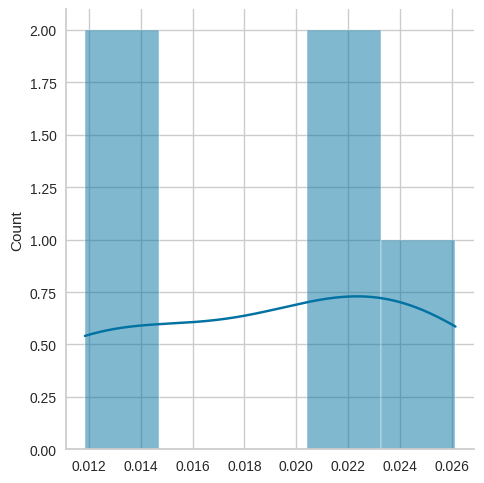

In [38]:
plt.figure(figsize=(13, 9))

sns.displot(np.abs(result), bins=len(result),kde=True)


# Sample submition set


Начальное представление данных

In [39]:
sample_submition

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


Полученное представление 

In [40]:
predictions = np.exp(first_model.predict(test_final))
submission = pd.concat([test_id, pd.Series(predictions, name='SalePrice')], axis=1)
submission

,Id,SalePrice
0,1461,122387.241862
1,1462,153650.732571
2,1463,171061.314545
3,1464,191472.201547
4,1465,201035.634609
...,...,...
1454,2915,92077.282935
1455,2916,87223.232201
1456,2917,163832.438609
1457,2918,124176.754213


In [41]:
percentage = 100 - submission['SalePrice']/sample_submition['SalePrice']*100
print(percentage)
print(f"Mean value: {percentage.mean()}")

0       27.700040
1       18.165719
2        6.821069
3       -6.778326
4      -33.374596
          ...    
1454    44.890705
1455    47.069677
1456    25.266569
1457    32.849946
1458   -17.471800
Name: SalePrice, Length: 1459, dtype: float64
Mean value: 0.5890530410827954


Анализ важных признаков

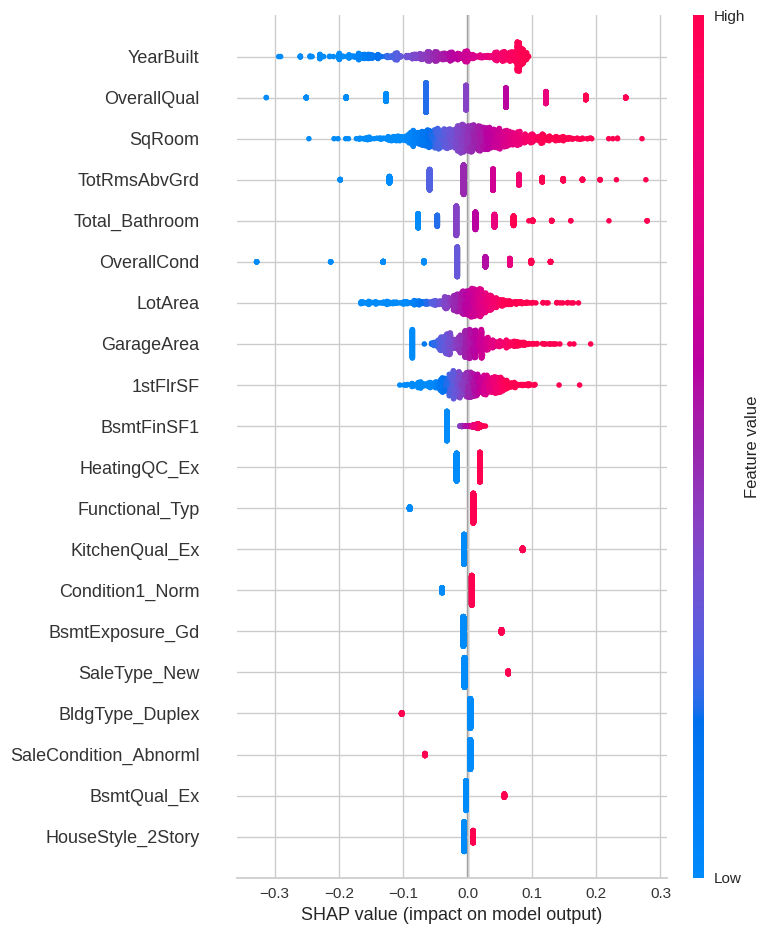

In [45]:
import shap

explainer = shap.LinearExplainer(first_model, train_final,feature_perturbation='independent')
shap_values = explainer(test_final)

shap.summary_plot(shap_values, test_final)